# Exploratory Data Analysis 

In [1]:
# LIBRERIAS NECESARIAS 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
df = pd.read_csv('EDA.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df['Mean'] = round((df['math_score']+df['reading_score']+df['writing_score'])/3, 2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [4]:
df_aprobados = df.loc[df['Mean']>59]
df_reprobados = df.loc[df['Mean']<=59]

Que tanto varian las calificaciones con respecto a la alimentacion


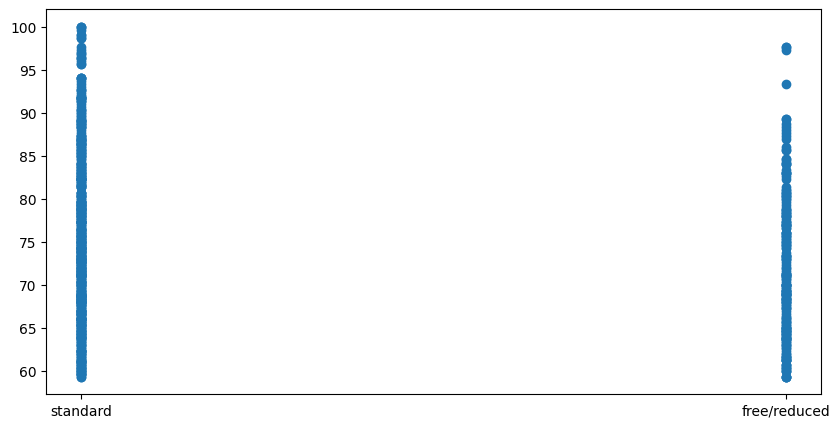

In [5]:
x = df_aprobados['Mean']
y = df_aprobados['lunch']
plt.figure(figsize=(10,5))
plt.scatter(y,x)

Que tanto varian las calificaciones con respecto al nivel de eduacion de los padres 

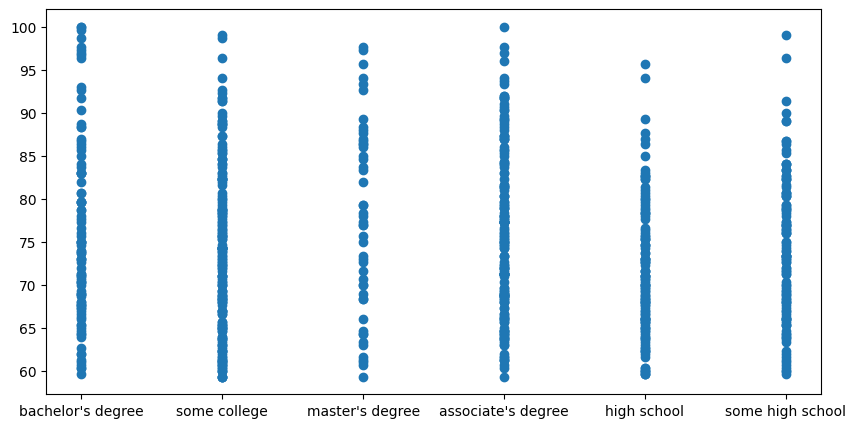

In [6]:
x = df_aprobados['Mean']
y = df_aprobados['parental_level_of_education']
plt.figure(figsize=(10,5))

plt.scatter(y,x)

In [7]:
df.loc[(df['parental_level_of_education']=="high school")].min()

gender                               female
race_ethnicity                      group A
parental_level_of_education     high school
lunch                          free/reduced
test_preparation_course           completed
math_score                                8
reading_score                            24
writing_score                            15
Mean                                  18.33
dtype: object

In [8]:
df.loc[(df['parental_level_of_education']=="some high school")].min()

gender                                   female
race_ethnicity                          group A
parental_level_of_education    some high school
lunch                              free/reduced
test_preparation_course               completed
math_score                                    0
reading_score                                17
writing_score                                10
Mean                                        9.0
dtype: object

In [9]:
df.loc[(df['parental_level_of_education']=="some college")].min()

gender                               female
race_ethnicity                      group A
parental_level_of_education    some college
lunch                          free/reduced
test_preparation_course           completed
math_score                               19
reading_score                            23
writing_score                            19
Mean                                  23.33
dtype: object

In [10]:
df.loc[(df['parental_level_of_education']=="associate's degree")].min()

gender                                     female
race_ethnicity                            group A
parental_level_of_education    associate's degree
lunch                                free/reduced
test_preparation_course                 completed
math_score                                     26
reading_score                                  31
writing_score                                  35
Mean                                        31.67
dtype: object

In [11]:
df.loc[(df['parental_level_of_education']=="bachelor's degree")].min()

gender                                    female
race_ethnicity                           group A
parental_level_of_education    bachelor's degree
lunch                               free/reduced
test_preparation_course                completed
math_score                                    29
reading_score                                 41
writing_score                                 38
Mean                                        39.0
dtype: object

In [12]:
df.loc[(df['parental_level_of_education']=="master's degree")].min()

gender                                  female
race_ethnicity                         group A
parental_level_of_education    master's degree
lunch                             free/reduced
test_preparation_course              completed
math_score                                  40
reading_score                               42
writing_score                               46
Mean                                     44.67
dtype: object

In [13]:
df_education = df.loc[: ,['gender','parental_level_of_education', 'race_ethnicity', 'Mean','lunch']]
df_education
    

,gender,parental_level_of_education,race_ethnicity,Mean,lunch
0,female,bachelor's degree,group B,72.67,standard
1,female,some college,group C,82.33,standard
2,female,master's degree,group B,92.67,standard
3,male,associate's degree,group A,49.33,free/reduced
4,male,some college,group C,76.33,standard
...,...,...,...,...,...
995,female,master's degree,group E,94.00,standard
996,male,high school,group C,57.33,free/reduced
997,female,high school,group C,65.00,free/reduced
998,female,some college,group D,74.33,standard


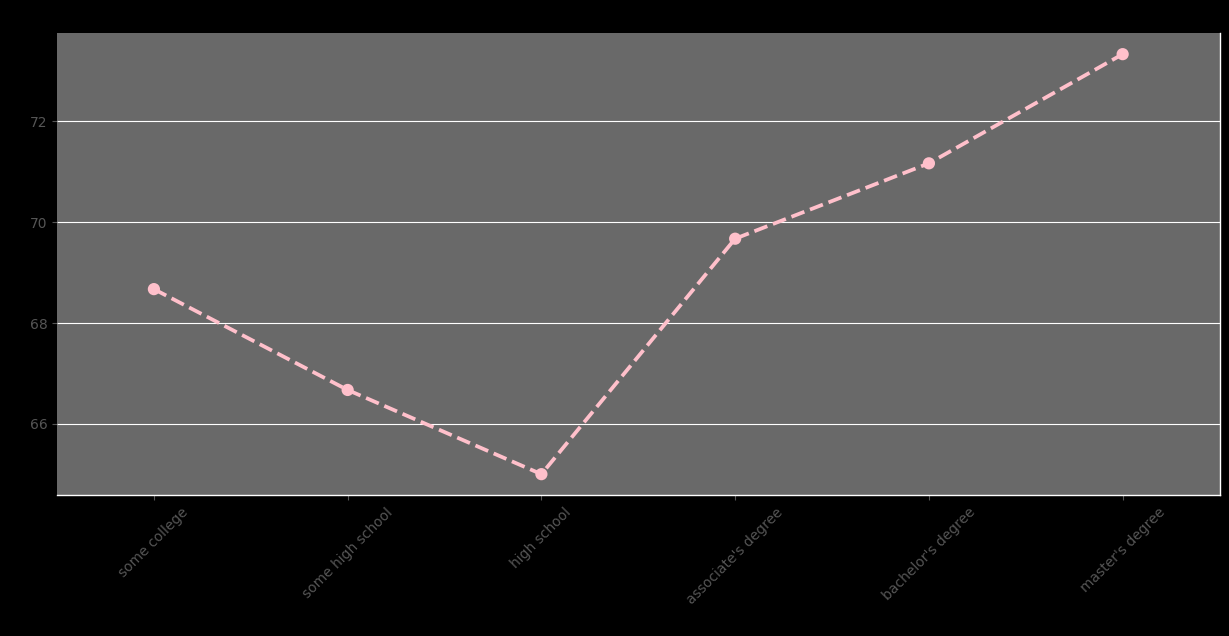

In [67]:
# Establecer el tamaño de la figura
plt.rcParams['figure.figsize'] = [15, 6]

# Mediana agrupada por nivel educativo de los padres
df_grouped_median = df.groupby('parental_level_of_education')['Mean'].median()

# Configurar la figura y el color de fondo
fig, ax = plt.subplots(facecolor='black', figsize=(15, 6))
ax.set_facecolor('dimgray')

# Gráfica de puntos
sns.pointplot(x=df_grouped_median.index,
              y=df_grouped_median.values,
              order=['some college', 'some high school', 'high school', "associate's degree", "bachelor's degree", "master's degree"],
              color='pink', 
              linestyles='dashed')

# Etiquetas para los ejes x e y
plt.xlabel('Nivel educativo de los padres')
plt.ylabel('Calificaciones medianas')
plt.title('El nivel educativo de los padres influye en las calificaciones de los estudiantes')

# Eliminar los bordes superior e izquierdo
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')

plt.xticks(rotation=45)
plt.show()



In [15]:
df.loc[(df['parental_level_of_education']=="associate's degree")].min()

gender                                     female
race_ethnicity                            group A
parental_level_of_education    associate's degree
lunch                                free/reduced
test_preparation_course                 completed
math_score                                     26
reading_score                                  31
writing_score                                  35
Mean                                        31.67
dtype: object

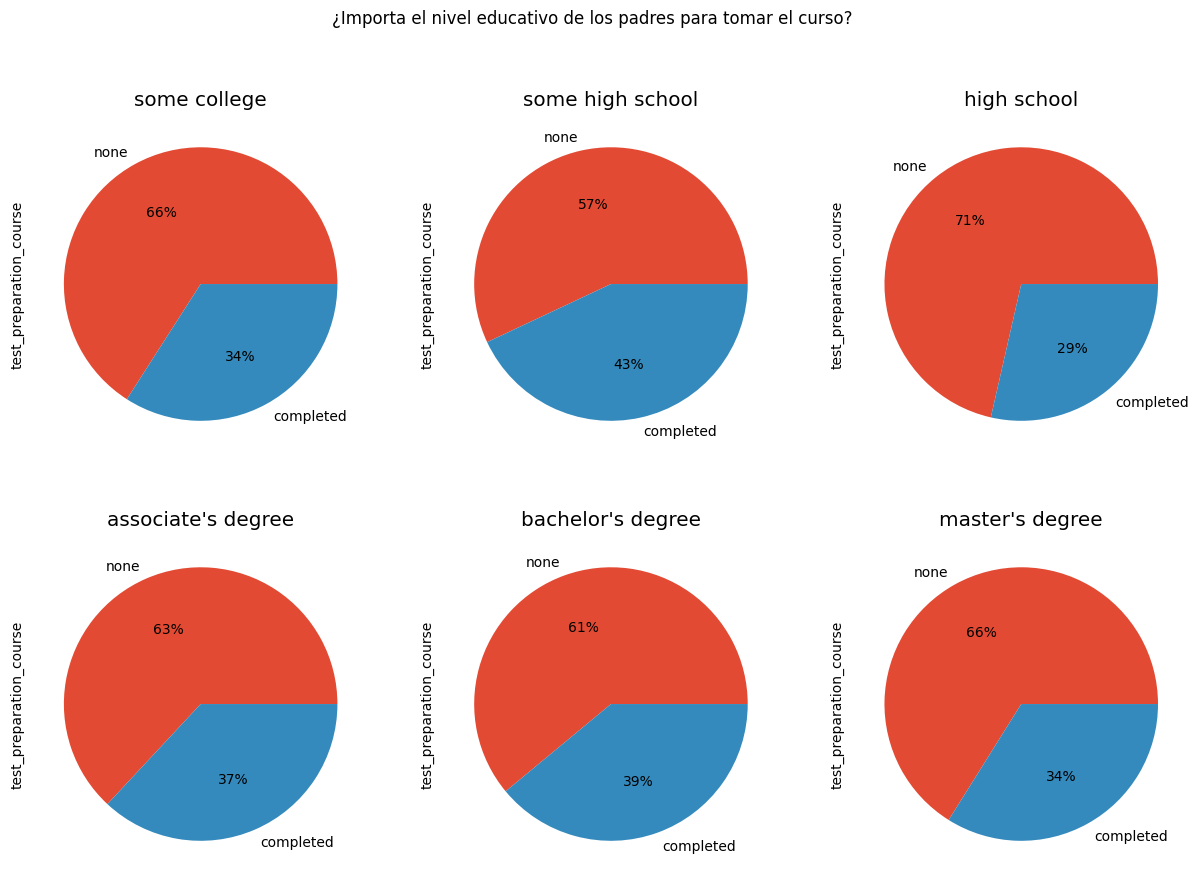

In [70]:
gped_educ_race = df.groupby('parental_level_of_education')['test_preparation_course'].value_counts(normalize=True)

plt.rcParams['figure.figsize'] = [15, 10]

f, _ = plt.subplots(2,3)

def plot_pie(gped_df, group, ax, f_n, s_n):
    
    gped_df.xs(group).plot(kind='pie', autopct='%1.0f%%', ax=ax[f_n][s_n])
    
    ax[f_n][s_n].title.set_text(group)


plot_pie(gped_educ_race, 'some college', _, 0, 0)
plot_pie(gped_educ_race, 'some high school', _, 0, 1)
plot_pie(gped_educ_race, 'high school', _, 0, 2)
plot_pie(gped_educ_race, "associate's degree", _, 1, 0)
plot_pie(gped_educ_race, "bachelor's degree", _, 1, 1)
plot_pie(gped_educ_race, "master's degree", _, 1, 2)


plt.suptitle("¿Importa el nivel educativo de los padres para tomar el curso?")
plt.show()